Serinin 1. ve 2. yazısında Python'ın popüler pandas, matplotlib, seaborn kütüphanelerini kullanarak veri analizi ve görselleştirme çalışmaları yapmıştık, umarım keyifli bir başlangıç olmuştur.

İlk iki yazıyı makine öğrenmesinden ziyade Python'a giriş olarak düşünebiliriz. Bu yazıdan itibaren farklı alanlardaki veri setleri üzerinde çeşitli makine öğrenmesi modelleri kurup bu modellerimizin kalitesini oranlarını arttırmak için çeşitli yöntemler deneyeceğiz.

Makine öğrenmesi modelleri arasında insanın düşünme tarzına en yakın olanın Karar Ağaçları (Decision Tree) olduğu düşünülür. Sözgelimi iş yerinizde öğle arası 12.30-13.30 arasıysa ve saat 12.10'sa biraz daha beklemeliyim diye düşünmeniz en basit karar ağacı modeline örnek olabilir.

İnsanların zihnindeki bazı karar ağaçlarının derinliği yukarıdaki gibi 1-2 olmakla birlikte çoğu zaman çok daha karmaşık karar ağaçları kurulur. Örneğin insan kaynakları departmanında çalışan birinin zihninde aşağıdakine benzer bir karar ağacı olabilir.

Eğer bir kişi x-y yaş aralığındaysa a, b, c, d, e okullarından mezunsa en az t yıl tecrübesi varsa ve daha önceki işlerinde çalışma süresi ortalama p yıldan fazlaysa mülakata çağıralım.

Karar Ağaçları bulunulan durumun entropi değerini (rastgelelik derecesini) düşüren seçimler yaparak bilgi kazancını (information gain) maksimize etmeye çalışır. Bunun için de her soruda (düğüm/node) hata fonksiyonunu tekrar hesaplayıp en düşük hataya sahip soruyu/durumu seçer.

Bilgi kazancını anlamak için de hemen herkesin bildiği sayı tutma oyununu düşünebiliriz . Örneğin 1'den 100'e kadar bir sayıyı en az soruyla bulmamız bekleniyorsa "sayı 50'den büyük mü küçük mü?" sorusunun cevabı "sayı 95'ten büyük mü küçük mü?" sorusunun cevabından daha çok bilgi kazanmamızı sağlar. Çünkü ilk soruyla seçenekleri yarıya indiririz. Sonrasında küçük cevabına karşı "sayı 25'ten büyük mü küçük mü?" diye oyunu en kısa sürede sonlandırabiliriz.

İlk derste olduğu gibi bu dersi takip etmek için de bilgisayarınıza Python kurmanıza veya veri setini indirmenize gerek yok. İhtiyacınız olan tek şey internet ve bu yazıyı okuduğunuza göre o konuda da bir sorunumuz yok. İzlemeniz gereken adımlar sırasıyla şöyle:

- Google hesabınızı açın.
- https://colab.research.google.com/ adresine gidin.
- NEW PYTHON 3 NOTEBOOK'a tıklayın.
- Oradaki satıra aşağıdaki kodu yapıştırın ve play tuşuna basın.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

df = pd.read_csv('https://raw.githubusercontent.com/HakkiKaanSimsek/Makine_Ogrenmesi_Dersleri/master/karar_agaclari/data/adult.csv')
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 
              'relationship','race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 
              'native-country', 'salary']
print(df.info())
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


İlk derste olduğu gibi sütunları isimlendirip veri tiplerini ve eksik veri olup olmadığını kontrol ettik. Modelimizdeki hedef değişken 'salary' olduğu için onun dağılımına bakıyoruz ve veri setinin geri kalanından ayırıyoruz.

In [2]:
X = df.drop(['salary'], axis=1)
y = df['salary']
print('Salary Distribution:')
print(y.value_counts())
y = np.where(df['salary'] == ' <=50K',0,1)

Salary Distribution:
 <=50K    24720
 >50K      7841
Name: salary, dtype: int64


Bu çalışmada işimize yaramasa da yanlış bir veri tipi olduğunda nasıl düzeltmemiz gerektiğine bir örnek yaptım. Capital-gain değişkeninin tipini 'integer' dan 'float' a çevirdim.

Şimdi de tipi object olan verilere hızlıca bir göz atalım.

In [3]:
df['capital-gain'] = df['capital-gain'].astype(float)
X.select_dtypes(include='object').tail(20)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
32541,?,HS-grad,Separated,?,Not-in-family,Black,Female,United-States
32542,?,HS-grad,Married-civ-spouse,?,Husband,White,Male,United-States
32543,Local-gov,Assoc-acdm,Divorced,Prof-specialty,Unmarried,White,Female,United-States
32544,Private,Masters,Divorced,Other-service,Not-in-family,Other,Female,United-States
32545,Local-gov,Assoc-acdm,Married-civ-spouse,Adm-clerical,Wife,White,Female,United-States
32546,Private,Assoc-acdm,Divorced,Tech-support,Not-in-family,White,Female,United-States
32547,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,Mexico
32548,Self-emp-not-inc,Prof-school,Never-married,Prof-specialty,Not-in-family,White,Male,United-States
32549,State-gov,Some-college,Divorced,Adm-clerical,Other-relative,White,Female,United-States
32550,Self-emp-not-inc,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States


Gördüğünüz gibi bazı veriler eksik olarak gözükmese de '?' soru işareti ile doldurulmuş. 

Yapmamız gerekenler sırasıyla şöyle:

1. Veri tipi 'object' olan sütunlar seçilir.
2. Bu sütunlar yine o sütunun mode() değeriyle doldurulur.

In [4]:
categorical_columns = [c for c in X.columns  if X[c].dtype.name == 'object']
for c in categorical_columns:
  X[c] = np.where(X[c] == ' ?', X[c].mode(), df[c])
X.select_dtypes(include='object').tail(20)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
32541,Private,HS-grad,Separated,Prof-specialty,Not-in-family,Black,Female,United-States
32542,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
32543,Local-gov,Assoc-acdm,Divorced,Prof-specialty,Unmarried,White,Female,United-States
32544,Private,Masters,Divorced,Other-service,Not-in-family,Other,Female,United-States
32545,Local-gov,Assoc-acdm,Married-civ-spouse,Adm-clerical,Wife,White,Female,United-States
32546,Private,Assoc-acdm,Divorced,Tech-support,Not-in-family,White,Female,United-States
32547,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,Mexico
32548,Self-emp-not-inc,Prof-school,Never-married,Prof-specialty,Not-in-family,White,Male,United-States
32549,State-gov,Some-college,Divorced,Adm-clerical,Other-relative,White,Female,United-States
32550,Self-emp-not-inc,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States


Makine öğrenmesi modelleri kategorik değişkenleri algılayamadığı için 'object' tipindeki değişkenleri one-hot-encoding yöntemiyle 0 ve 1'lere ayırıyoruz.

In [5]:
X = pd.concat([X, pd.get_dummies(X.select_dtypes(include='object'))], axis=1)
X = X.drop(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'], axis=1)
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Modelimizi kurmaya hazırız şimdi standart modelleme süreçlerini uygulayacağız.

1. Veriyi eğitim ve test alt-veri gruplarına ayırma.
2. Karar ağacı modeli oluşturma.
3. Modeli eğitim verisine 'fit' etme. 

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as cm
    
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
d_tree1 = DecisionTreeClassifier(max_depth = 2, random_state=42)
d_tree1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

4. Görmediğimiz test verisine modele verip tahminde bulunma.
5. Gerçek değerle tahmin arasındaki benzerliğe göre confusion matrix bulma.

In [1]:
predictions = d_tree1.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

NameError: name 'd_tree1' is not defined

6. Precision, recall, f1-score değerlerini bulma.

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['<=50K', '>50K']))

             precision    recall  f1-score   support

      <=50K       0.84      0.95      0.89      7455
       >50K       0.73      0.44      0.55      2314

avg / total       0.82      0.83      0.81      9769



7. Karar ağacını görselleştirme

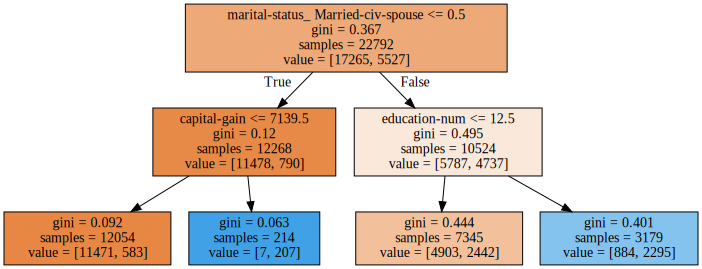

In [26]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

graph = Source(tree.export_graphviz(d_tree, out_file=None,feature_names=X.columns, filled = True))
display(SVG(graph.pipe(format='svg')))

8. Sınıflandırma modeli kurulurken yapılan öznitelik önem sıralamasını görselleştirme.

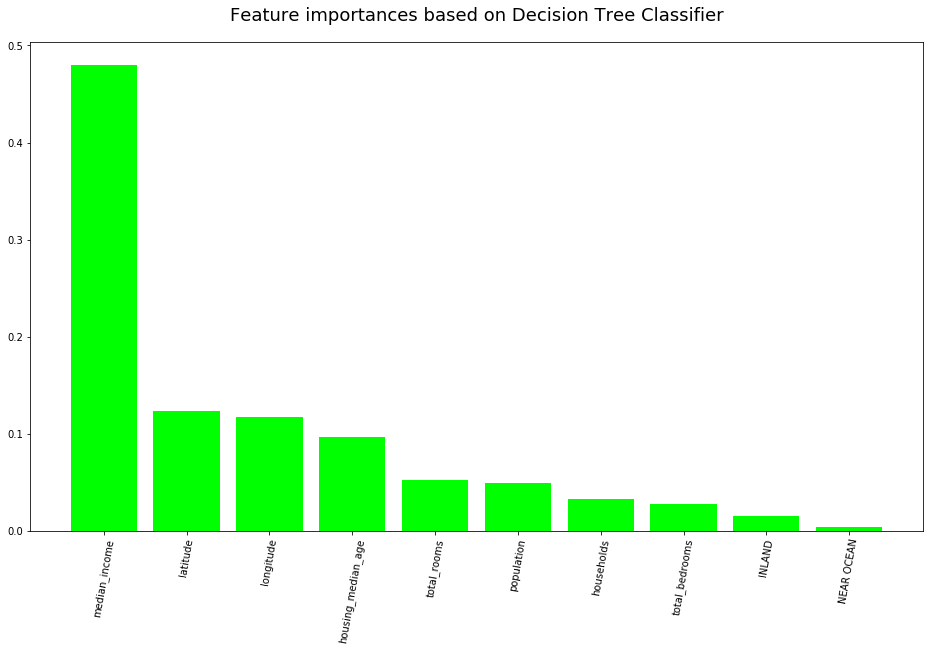

In [94]:
plt.figure(figsize=(16, 9))

from sklearn import ensemble

d_tree2 = DecisionTreeClassifier(max_depth = 8, random_state=42)
d_tree2.fit(X_train, y_train)
ranking = d_tree2.feature_importances_
features = np.argsort(ranking)[::-1][:10]
columns = X.columns

plt.title("Feature importances based on Decision Tree Classifier", y = 1.03, size = 18)
plt.bar(range(len(features)), ranking[features], color="lime", align="center")
plt.xticks(range(len(features)), columns[features], rotation=80)
plt.show()

Bu çalışma standart bir veri bilimi projesinin en basit hali olarak düşünülebilir. 

Yaptıklarımızı tekrarlayalım:

- Veri tiplerini kontrol etme/düzeltme.
- Açıklayıcı veri analizi ve görselleştirme.
- Eksik verileri tahmin etme/veri atama.
- Kategori tipindeki verileri one-hot encoding ile nümerik formata çevirme.
- Veri setini eğitim ve test veri-setlerine ayırma.
- Modeli eğitme ve test verisi üzerinde tahmin yapma.
- Sınıflandırma başarı metriklerine bakma.
- Karar ağacını görselleştirme.
- Modelin yaptığı öznitelik sıralamasını görselleştirme.